## Nutritional Adequacy

Installing requirements...


In [66]:
!pip install -r requirements.txt

In [67]:
user = "mprakasam"
apikey = {'mprakasam':"x6M5kQkjnIRGplxtj6JtiZIvMaWHjQWwIpKye4kH"}

### Read in data



In [68]:
import pandas as pd
import warnings

df = pd.read_csv("Data/foods.csv")
df

,Food,FDC
0,Field Pea,788400
1,Banana,786652
2,Barley,170284
3,Beef,170199
4,Beer,789593
5,Boye/Yam,170071
6,Bula,557807
7,Butter/Ghee,789022
8,Cassava,169985
9,Chat / Kat (tree/plant),168553


### Get nutritional dataframe

In [69]:
import fooddatacentral as fdc

D = {}
count = 0
for food in  df.Food.tolist():
    try:
        FDC = df.loc[df.Food==food,:].FDC[count]
        count+=1
        D[food] = fdc.nutrients(apikey[user],FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food,FDC))        

D = pd.DataFrame(D,dtype=float)

In [70]:
D

,Banana,Barley,Beef,Beer,Boye/Yam,Bula,Butter/Ghee,Cassava,Chat / Kat (tree/plant),Cheese,...,Red pepper (berbere),Salt,Soft drinks/Soda,Sorghum,Sugar,Sweet potato,Tea,Teff,Tomato,Wheat
10:0,0.001,0.000,0.020,0.000,0.000,NaN,2.495,0.000,NaN,0.664,...,0.000,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.001
12:0,0.002,0.003,0.020,0.000,0.000,NaN,2.793,0.001,NaN,0.743,...,0.000,NaN,0.00,0.001,NaN,NaN,NaN,NaN,NaN,0.008
13:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14:0,0.002,0.006,0.360,0.000,0.000,NaN,10.005,0.000,NaN,2.473,...,0.000,NaN,0.00,0.002,NaN,NaN,NaN,NaN,NaN,0.007
14:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN
15:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16:0,0.102,0.208,2.740,0.000,0.034,NaN,26.166,0.069,NaN,6.837,...,0.025,NaN,0.00,0.543,NaN,NaN,NaN,NaN,NaN,0.440
16:1,0.010,0.003,1.100,0.000,0.000,NaN,2.228,0.000,NaN,0.445,...,0.002,NaN,0.00,0.016,NaN,NaN,NaN,NaN,NaN,0.019
16:1 c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Helper Functions



In [71]:
#getting necessary string to for age-sex groups
def get_age_sex_group(string):
    if ((string == 'M 0-3') or (string == 'F 0-3')):
        group = "C 1-3"
    else:
        return string
    return group

In [72]:
#getting rda for number of individuals belonging to certain age-sex group
def get_rda(group, amount):
    
    # Define *minimums*
    bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]
    
    return amount*bmin

In [73]:
household = pd.read_csv("Data/household.csv", dtype={'j': object}) 

#creating list of age brackets to iterate through
age_brackets = list(household.columns)
age_brackets = age_brackets[2:]

#getting rda for entire household
def get_household_rda(h_id):
    rda = 0
    for x in age_brackets:
        group = get_age_sex_group(x)
        amount = household.iloc[h_id][x]
        rda += get_rda(group, amount)
    return rda

In [74]:
#dummy to get nutrients that are in diet minumums
bmin = get_rda(get_age_sex_group('M 0-3'), 1)

In [75]:
#filling in missing nutrient information with 0
Aall = D.fillna(0)

#selecting only nutrients that are in our diet minimums
Amin = Aall.loc[bmin.index]

Amin.rename(columns={'Soft drinks/ Soda':'Soft drinks/Soda'}, inplace=True)
Amin

,Banana,Barley,Beef,Beer,Boye/Yam,Bula,Butter/Ghee,Cassava,Chat / Kat (tree/plant),Cheese,...,Red pepper (berbere),Salt,Soft drinks/Soda,Sorghum,Sugar,Sweet potato,Tea,Teff,Tomato,Wheat
Nutrition,,,,,,,,,,,,,,,,,,,,,
Energy,89.000,1473.000,828.000,43.000,494.000,92.00,876.000,667.000,166.000,330.000,...,31.000,0.0,51.00,1377.000,375.0,167.00,15.0,383.00,71.00,274.000
Protein,1.090,9.910,14.680,0.460,1.530,2.65,0.280,1.360,0.290,16.860,...,0.990,0.0,0.00,10.620,0.0,3.33,0.0,12.77,14.29,10.670
"Fiber, total dietary",2.600,15.600,0.000,0.000,4.100,0.90,0.000,1.800,3.700,0.000,...,2.100,0.0,0.00,6.700,0.0,2.50,0.0,10.60,14.30,4.000
"Folate, DFE",20.000,23.000,5.000,6.000,23.000,0.00,0.000,27.000,15.000,7.000,...,46.000,0.0,0.00,20.000,0.0,0.00,0.0,0.00,0.00,99.000
"Calcium, Ca",5.000,29.000,7.000,4.000,17.000,0.00,4.000,16.000,8.000,682.000,...,7.000,0.0,5.00,13.000,0.0,17.00,0.0,128.00,0.00,125.000
"Carbohydrate, by difference",22.840,77.720,0.140,3.550,27.880,39.82,0.000,38.060,10.780,8.560,...,6.030,0.0,13.30,72.090,100.0,38.33,3.8,74.47,35.71,47.540
"Iron, Fe",0.260,2.500,1.690,0.020,0.540,0.00,0.000,0.270,0.160,0.260,...,0.430,0.0,0.05,3.360,0.0,0.30,0.0,11.49,2.57,3.600
"Magnesium, Mg",27.000,79.000,14.000,6.000,21.000,0.00,0.000,21.000,5.000,27.000,...,12.000,0.0,1.00,165.000,0.0,0.00,0.0,0.00,0.00,41.000
Niacin,0.665,4.604,3.660,0.513,0.552,0.00,0.003,0.854,3.500,0.155,...,0.979,0.0,0.00,3.688,0.0,0.00,0.0,0.00,0.00,5.590


In [76]:
nutrient_list = list(Amin.index)

#creating inadequate nutrient dictionary
inadequate = {}
for x in nutrient_list:
    inadequate[x] = 0

In [77]:
#reading in csv files into DataFrames
consumption = pd.read_csv("Data/consumption.csv", dtype={'j': object})
household = pd.read_csv("Data/household.csv", dtype={'j': object}) 
consumption_cleaned = consumption.copy()

#keeping only rows with gram data
consumption_cleaned.drop(consumption_cleaned[consumption_cleaned["u"] != "Gram"].index, axis=0, inplace=True)

#merging consumption and household data csvs
consumption_cleaned["id"] = consumption_cleaned["t"].astype("str") + consumption_cleaned["j"]
household["id"] = household["t"].astype("str") + household["j"]
merged = pd.merge(consumption_cleaned, household, on="id")

In [78]:
#selecting food columns
foods_consumed = merged[['id','Banana', 'Barley', 'Beef', 'Beer','Boye/Yam', 'Bula', 'Butter/Ghee', 'Cassava', 'Chat / Kat (tree/plant)','Cheese', 'Chick Pea', 'Coffee', 'Eggs', 'Field Pea', 'Fish (tilapia)','Goat & Mutton Meat', 'Godere (tuber)', 'Green Chili Pepper (Kariya)','Greens (kale, cabbage, etc.)', 'Ground Nuts', 'Haricot Beans', 'Horsebeans', 'Kocho (banana flour)', 'Lentils', 'Linseed', 'Maize','Meat', 'Milk', 'Millet', 'Niger Seed', 'Oils (processed)', 'Onion','Orange', 'Pasta/Macaroni', 'Potato', 'Poultry', 'Red pepper (berbere)', 'Salt', 'Soft drinks/Soda', 'Sorghum', 'Sugar', 'Sweet potato', 'Tea', 'Teff', 'Tomato', 'Wheat']]

foods_consumed = pd.DataFrame(foods_consumed)
foods_consumed = foods_consumed.set_index('id')

#filling in zero values for NaN values
foods_consumed = foods_consumed.fillna(0)
foods_consumed = foods_consumed.reset_index()

#re-merging our DataFrames
main = pd.merge(foods_consumed, household, on="id")

## Nutritional Adequacy

In [82]:
#initializing food list to iterate through
food_list = ['Banana', 'Barley', 'Beef', 'Beer','Boye/Yam', 'Bula', 'Butter/Ghee', 'Cassava', 'Chat / Kat (tree/plant)','Cheese', 'Chick Pea', 'Coffee', 'Eggs', 'Field Pea', 'Fish (tilapia)','Goat & Mutton Meat', 'Godere (tuber)', 'Green Chili Pepper (Kariya)','Greens (kale, cabbage, etc.)', 'Ground Nuts', 'Haricot Beans', 'Horsebeans', 'Kocho (banana flour)', 'Lentils', 'Linseed', 'Maize','Meat', 'Milk', 'Millet', 'Niger Seed', 'Oils (processed)', 'Onion','Orange', 'Pasta/Macaroni', 'Potato', 'Poultry', 'Red pepper (berbere)', 'Salt', 'Soft drinks/Soda', 'Sorghum', 'Sugar', 'Sweet potato', 'Tea', 'Teff', 'Tomato', 'Wheat']

#initializing dictionary of counts
list_of_enough = {'trues':0, 'falses':0}

#selecting a single year
remerged = main.loc[main["t"] == 2015]

for index, row in remerged.iterrows():
    
    #getting nutritional requirements for household
    nutrients_required = get_household_rda(index)
    nutrients_consumed = pd.DataFrame(Amin.index)
    nutrients_consumed["Values"] = 0
    nutrients_consumed = nutrients_consumed.set_index("Nutrition")
    nutrients_consumed = pd.Series(nutrients_consumed.T.squeeze())
    
    #seeing how much each household consumed of each food and getting nutritional data for that amount of food
    for food in food_list:
        amount = row[food]
        nutrients_consumed = nutrients_consumed + amount*Amin[food]
    nutrients_consumed = pd.DataFrame(nutrients_consumed)
    nutrients_required = pd.DataFrame(nutrients_required)
    nutrients = nutrients_consumed 
    nutrients["required"] = nutrients_required
    
    #comparing nutrients consumed and nutrients required
    nutrients["enough"] = nutrients[0] >= nutrients["required"]
    for x in nutrient_list:
        if nutrients["enough"][x] == False:
            inadequate[x] += 1
        
#returning how many households failed to meet requirements (mapped to nutrients)
inadequate

{'Calcium, Ca': 1243,
 'Carbohydrate, by difference': 579,
 'Energy': 592,
 'Fiber, total dietary': 807,
 'Folate, DFE': 1064,
 'Iron, Fe': 828,
 'Magnesium, Mg': 1120,
 'Niacin': 998,
 'Phosphorus, P': 1157,
 'Potassium, K': 1107,
 'Protein': 894,
 'Riboflavin': 986,
 'Thiamin': 1028,
 'Vitamin A, RAE': 1153,
 'Vitamin B-12': 2255,
 'Vitamin B-6': 1042,
 'Vitamin C, total ascorbic acid': 1049,
 'Vitamin E (alpha-tocopherol)': 995,
 'Vitamin K (phylloquinone)': 1031,
 'Zinc, Zn': 1155}

In [83]:
#getting total number of households
num_households = len(remerged)

In [84]:
#creating DataFrame from dictionary
inadequate_df = pd.DataFrame.from_dict(inadequate, orient='index')

#renaming columns
inadequate_df.columns = ["# Households Not Meeting RDA"]

#creating a column for % of households not meeting RDAs and 
inadequate_df["% Households Not Meeting RDA"] = (inadequate_df["# Households Not Meeting RDA"]*100/num_households).round(2)

#sorting DataFrame in descending order by # of households not meeting a specific nutrient recommendation
inadequate_df = inadequate_df.sort_values(by="# Households Not Meeting RDA", ascending=False)
inadequate_df

,# Households Not Meeting RDA,% Households Not Meeting RDA
Vitamin B-12,2255,90.82
"Calcium, Ca",1243,50.06
"Phosphorus, P",1157,46.60
"Zinc, Zn",1155,46.52
"Vitamin A, RAE",1153,46.44
"Magnesium, Mg",1120,45.11
"Potassium, K",1107,44.58
"Folate, DFE",1064,42.85
"Vitamin C, total ascorbic acid",1049,42.25
Vitamin B-6,1042,41.97


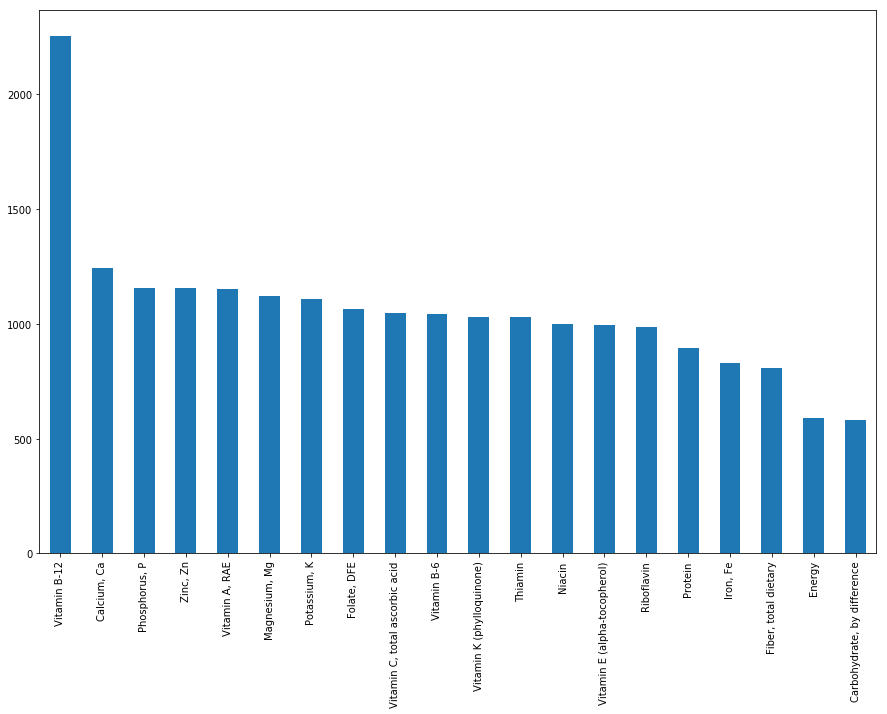

In [85]:
#plotting # of households
inadequate_df["# Households Not Meeting RDA"].plot.bar(figsize=(15,10));